## Residuals from GW151226
This work is done as a bachelor thesis by **Felicia Fredriksson**, Uppsala univerisity. The thesis will be published shortly onto Diva with the title: **_Investigating residuals from gravitational wave events, GW151012 and GW151226_.**
    
    
As previously stated the work is based upon the paper mentioned below. The scripts are altered to work for GW151226. It calculates the PSD aswell as the Pearson's correlation coefficient for the original data and the residuals. 

Before using this script please run **CreatResiduals_GW151226.py** to download the data.

# Figure 1: Correlations in Residual Data

**Alex B. Nielsen<sup>1,2</sup>, Alexander H. Nitz<sup>1,2</sup>, Collin Capano<sup>1,2</sup>, and Duncan A. Brown<sup>3</sup>**

 <sub>1. [Albert-Einstein-Institut, Max-Planck-Institut for Gravitationsphysik, D-30167 Hannover, Germany](http://www.aei.mpg.de/obs-rel-cos)</sub>  
 <sub>2. Leibniz Universitat Hannover, D-30167 Hannover, Germany</sub>  
 <sub>3. Department of Physics, Syracuse University, Syracuse, NY 13244, USA</sub>  

![Creative Commons License](https://i.creativecommons.org/l/by-sa/3.0/us/88x31.png "Creative Commons License")

This work is licensed under a [Creative Commons Attribution-ShareAlike 3.0 United States License](http://creativecommons.org/licenses/by-sa/3.0/us/).

We encourage use of these data in derivative works. If you use the material provided here, please cite [our paper.](https://arxiv.org/abs/1811.04071)

## Set up

Before running this notebook, you should run the [CreateResiduals](https://github.com/gwastro/gw150914_investigation/blob/master/CreateResiduals.ipynb) notebook to download the strain data and compute the maximum likelihood waveform.

In [1]:
%matplotlib inline
import os
import pylab, numpy
import res_GW151226
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The plots are written to the directory specified here. You can change the value of `output_dir` to the path where you want the plots to be written.

In [2]:
output_dir = '../paper'
!mkdir -p {output_dir}

Read in the strain data.

In [3]:
strain = res_GW151226.get_raw_strain()

**The cleaning of the data**

Plot the PSD after applying the highpass filter

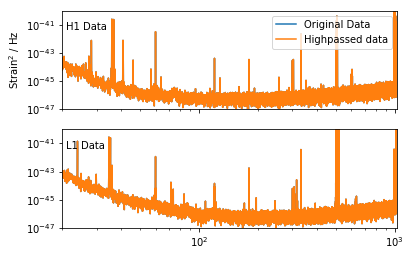

In [4]:
fig, axs = pylab.subplots(2, 1, sharex=True)
bp1 = res_GW151226.highpass_raw_strain(strain)
for ifo, ax in zip(res_GW151226.ifos, axs):
    # power spectrum of the data
    pylab.sca(ax)
    pylab.text(21, .4e-41, '%s Data' % ifo)
    psd = strain[ifo].psd(32)
    pylab.plot(psd.sample_frequencies, psd, label='Original Data')
    
    # Power spectrum of the bandpassed data
    psd2 = bp1[ifo].psd(32)
    pylab.plot(psd2.sample_frequencies, psd2, label='Highpassed data')
    
    if ifo=='H1':
        pylab.ylabel('Strain$^2$ / Hz')
        pylab.legend(loc='upper right', fontsize=10)
    pylab.xlim(20, 1024)
    pylab.ylim(1e-47, 1e-40)
    pylab.xscale('log')
    pylab.yscale('log')
pylab.sca(axs[1])

Apply the bandpass and notch the already highpassed data, then plot the PSD.

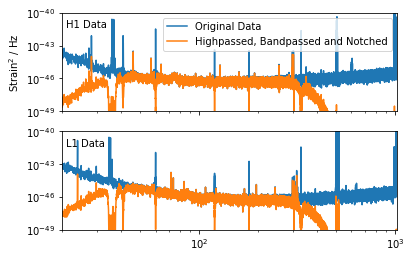

In [5]:
fig, axs = pylab.subplots(2, 1, sharex=True)
bp = res_GW151226.bandpass(bp1)
for ifo, ax in zip(res_GW151226.ifos, axs):
    # power spectrum of the data
    pylab.sca(ax)
    pylab.text(21, .4e-41, '%s Data' % ifo)
    psd = strain[ifo].psd(32)
    pylab.plot(psd.sample_frequencies, psd, label='Original Data')
    
    # Power spectrum of the bandpassed data
    psd2 = bp[ifo].psd(32)
    pylab.plot(psd2.sample_frequencies, psd2, label='Highpassed, Bandpassed and Notched')
    
    if ifo=='H1':
        pylab.ylabel('Strain$^2$ / Hz')
        pylab.legend(loc='upper right', fontsize=10)
    pylab.xlim(20, 1024)
    pylab.ylim(1e-49, 1e-40)
    pylab.xscale('log')
    pylab.yscale('log')
    
pylab.sca(axs[1])

## Compute correlation statistic for the different residuals

The data is bandpassed using the method explained in the LOSC notebooks. This bandpassing uses the GWOSC-provided method and is implemented in the function [`bandpass()`](https://github.com/gwastro/gw150914_investigation/blob/master/res.py#L172) provided in the module [res.py](https://github.com/gwastro/gw150914_investigation/blob/master/res.py) with these supplemental materials.

The actual correlation is computed by the function [`cross_correlation()`](https://github.com/gwastro/gw150914_investigation/blob/master/res.py#L198) in the module [res.py](https://github.com/gwastro/gw150914_investigation/blob/master/res.py). This is the cross correlation function used by Creswell et al. We copied this code directly from [the notebook provided by Creswell et al.](http://www.nbi.ku.dk/gravitational-waves/correlations.html) that is linked from the ["Comments on our paper, On the time lags of the LIGO signals."](http://www.nbi.ku.dk/gravitational-waves/gravitational-waves.html) The only changes we make here are to accomodate our Python data types. In the notebook provided by Creswell et al., the strain and times come from 2D numpy arrays that were loaded from text files. Here, ``h1`` and ``l1`` are `pycbc.TimeSeries` types.

### Correlation of the data containing the GW151226 signal

In [6]:
ts = res_GW151226.bandpass(strain)
tau, corr = res_GW151226.cross_correlation(ts['H1'], ts['L1'], res_GW151226.corr_time)
print res_GW151226.corr_near_ml(corr)

0.3418331563966705


### Correlation of the residuals with the maxiumum likelihood waveform subtracted

We subtract the maximum likelihood waveform computed based on the parameters measured by [Biwer et al.](https://arxiv.org/abs/1807.10312)

In [7]:
ts3 = res_GW151226.get_residual_strain()
ts3 = res_GW151226.bandpass(ts3)
tau, corr_null2 = res_GW151226.cross_correlation(ts3['H1'], ts3['L1'], res_GW151226.corr_time)
print res_GW151226.corr_near_ml(corr_null2)

0.35619170885275986


## Figure 2

Correlation between the Hanford and Livingston data released by [GWOSC](https://www.gw-openscience.org/events/GW150914/) that has been band-passed and notched in the same way as used to produce Figure 1 of [Abbott et al.](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.116.061102). This data has an updated calibration compared to data used in [Abbott et al.](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.116.061102). The figure also contains the correlation for residuals constructed by subtracting the maximum likelihood model waveform found in [Biwer et al.](https://arxiv.org/abs/1807.10312). The correlations for these residuals are seen to be significantly lower than for the residuals constructed from the example numerical waveform from Fig. 1 of [Abbott et al.](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.116.061102).

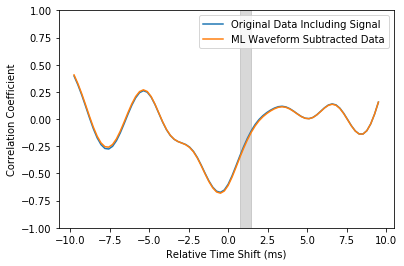

In [8]:
pylab.figure()
pylab.plot(tau*1000, corr, label='Original Data Including Signal')
pylab.plot(tau*1000, corr_null2, label='ML Waveform Subtracted Data')
pylab.xlabel('Relative Time Shift (ms)')

_, _, s, e = res_GW151226.indices_within_window(corr)
pylab.axvspan(s*1000, e*1000, alpha=0.3, color='grey', zorder=-1)
pylab.legend()
pylab.ylim(-1, 1)
pylab.ylabel('Correlation Coefficient')
pylab.savefig(os.path.join(output_dir,'fig2.pdf'), dpi=200)